# EDA

## EDA 데이터 준비

In [1]:
import sys
sys.path.append('./data_prep')
sys.path.append('./models')
sys.path.append('./visualization')

from data_preparation import get_data
import eda_plot as eda

df = get_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34247 entries, 0 to 34617
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            34247 non-null  int64  
 1   service_type                  34247 non-null  object 
 2   address1                      34247 non-null  object 
 3   address2                      34247 non-null  object 
 4   _floor                        34247 non-null  int64  
 5   size_m2                       34247 non-null  float64
 6   sales_type                    34247 non-null  object 
 7   rent                          34247 non-null  int64  
 8   deposit                       34247 non-null  int64  
 9   manage_cost                   34247 non-null  float64
 10  manage_cost_inc               34247 non-null  object 
 11  manage_cost_count             34247 non-null  int64  
 12  elevator                      34247 non-null  int64  
 13  r

## 매물 정보 EDA

### 범주형 변수

- 원룸, 월세 매물이 압도적으로 많음
- 남향, 동향 우세

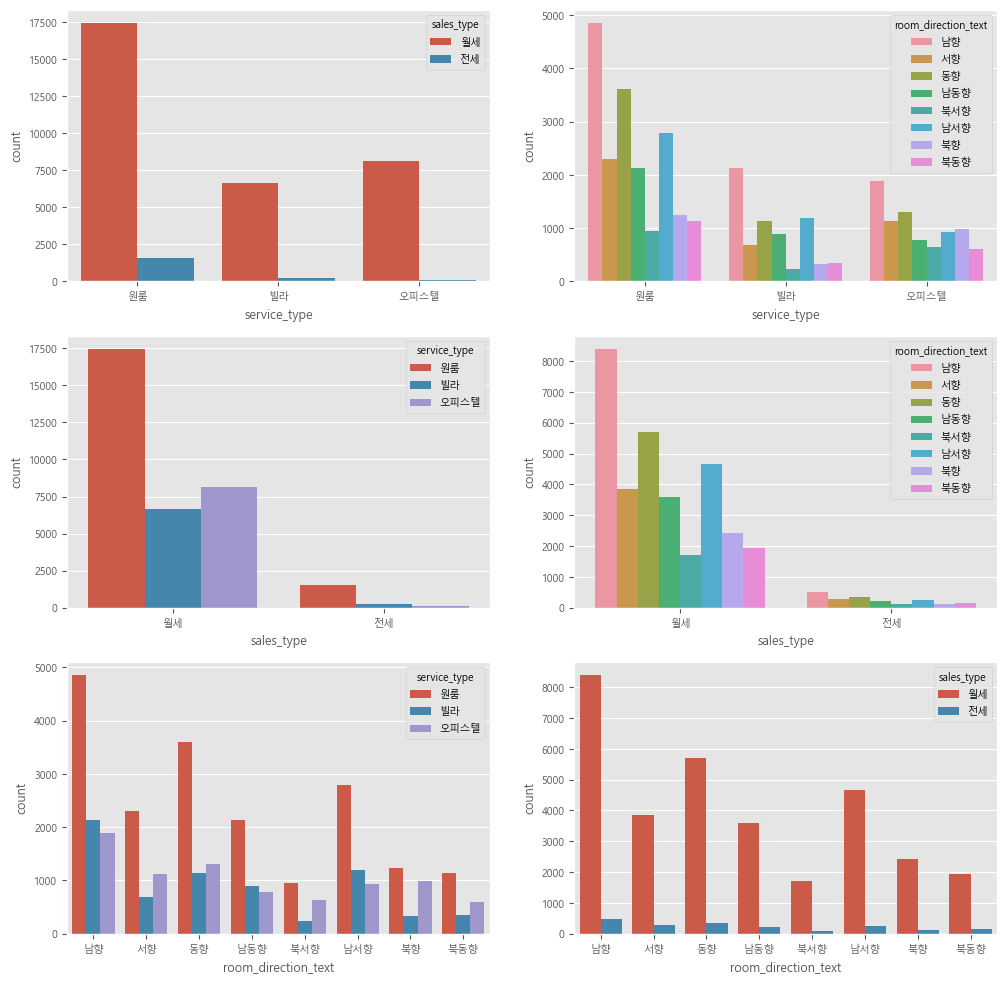

In [2]:
eda.cate_countplot(df, eda.zigbang_categorical)

### 수치형 변수
- 분포가 집중되어 있는 데이터가 많음
- 왜도 기준: 
- 첨도 기준:

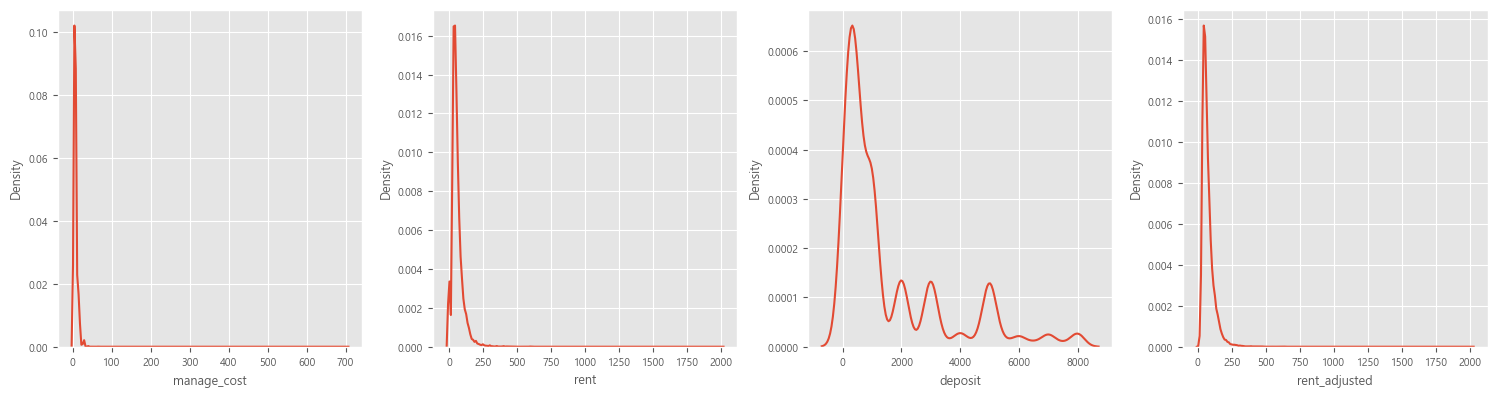

In [3]:
# 주거 비용 변수 (관리비, 월세, 보증금, 월주거비용)
eda.numer_distplot(df, eda.room_cost)

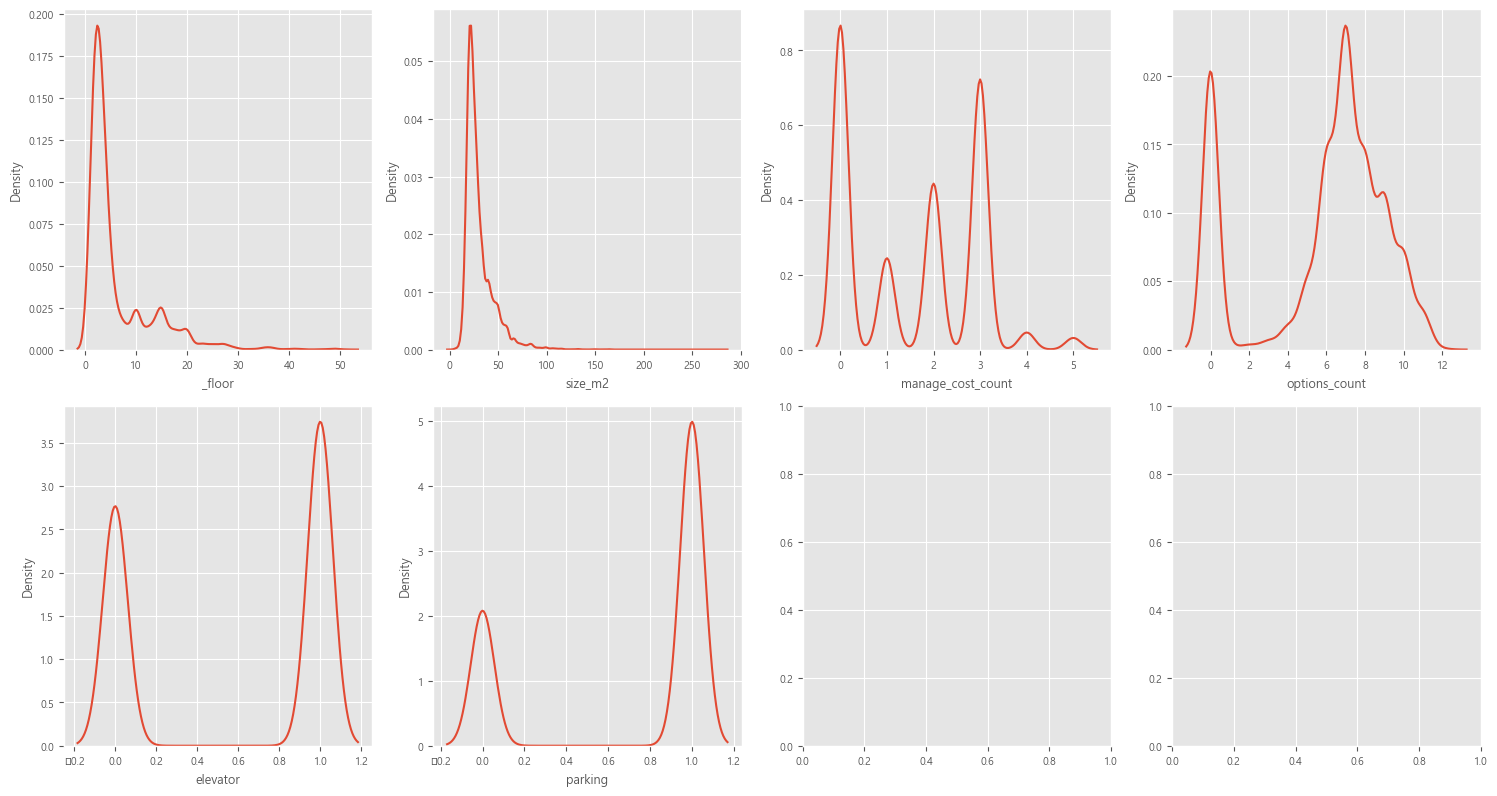

In [4]:
# 매물 컨디션 변수 (층, 크기, 관리비 커버리지, 옵션 수, 승강기 유무, 주차 가능 여부)
eda.numer_distplot(df, eda.room_cond)

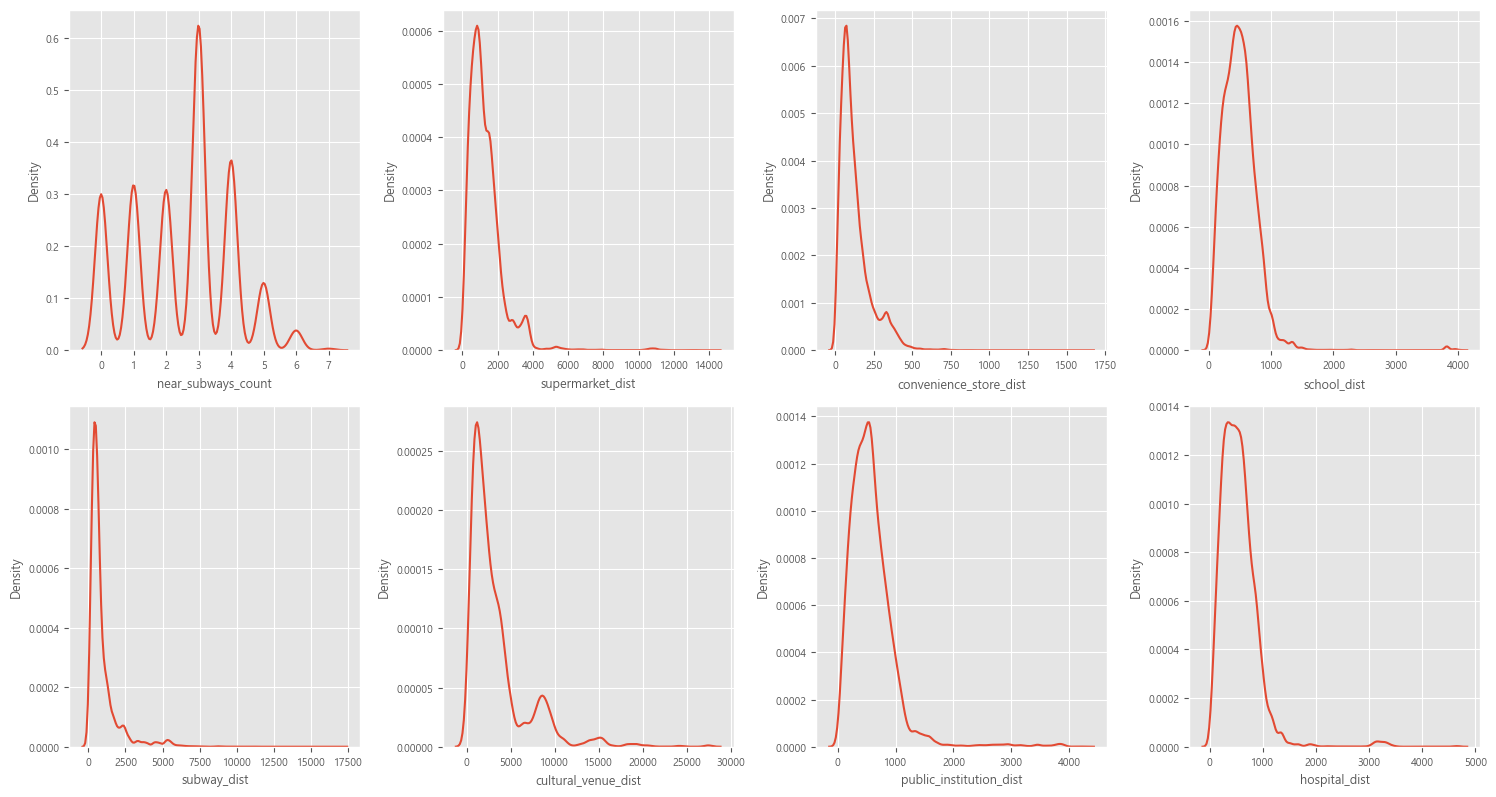

In [5]:
# 매물 주변환경 변수 (인근 지하철 호선 수, 슈퍼마켓 거리, 편의점 거리, 학교 거리, 지하철역 거리, 문화시설 거리, 공공기관 거리, 병원 거리)
eda.numer_distplot(df, eda.room_env)

## 지역 정보 EDA

### 변수 분포 확인

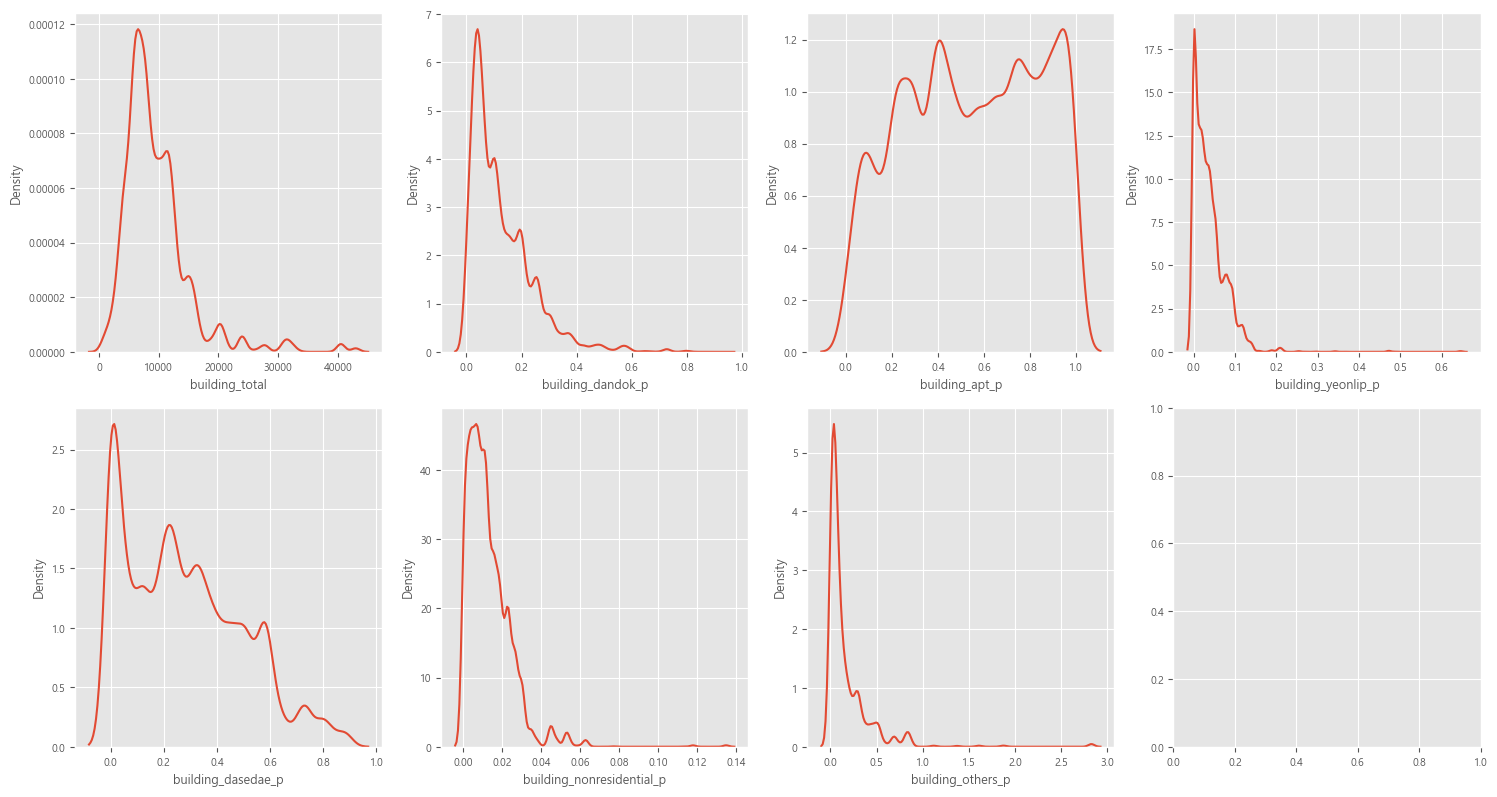

In [6]:
# 지역의 주택 관련 변수 (총 주택 수, 단독주택 비율, 아파트 비율, 연립주택 비율, 다세대 비율, 비거주용 건물내 주택 비율, 주택 이외의 거처 비율) 
eda.numer_distplot(df, eda.local_building_type)

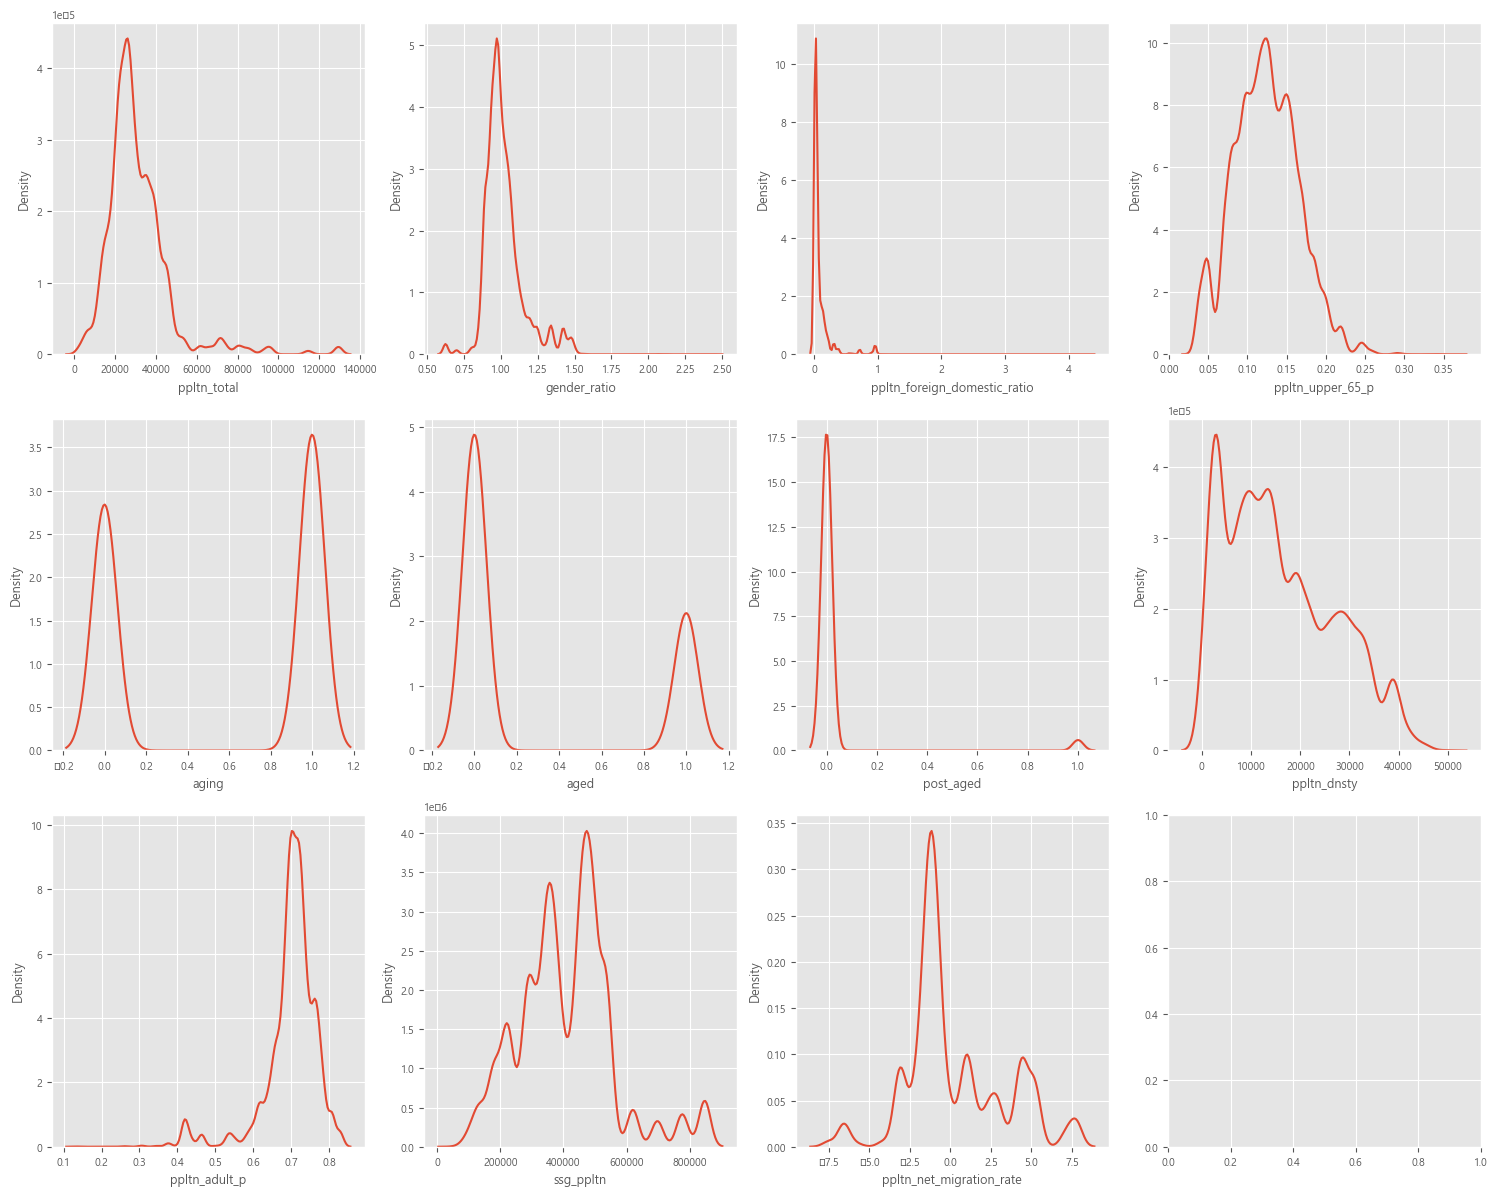

In [7]:
# 지역의 인구 관련 변수 (총 인구, 성비, 내국인대비외국인비, 65세 이상 인구수 비율, 고령화지수, 인구밀도, 청장년 인구 수 비율, 순이동률)
eda.numer_distplot(df, eda.local_ppltn)

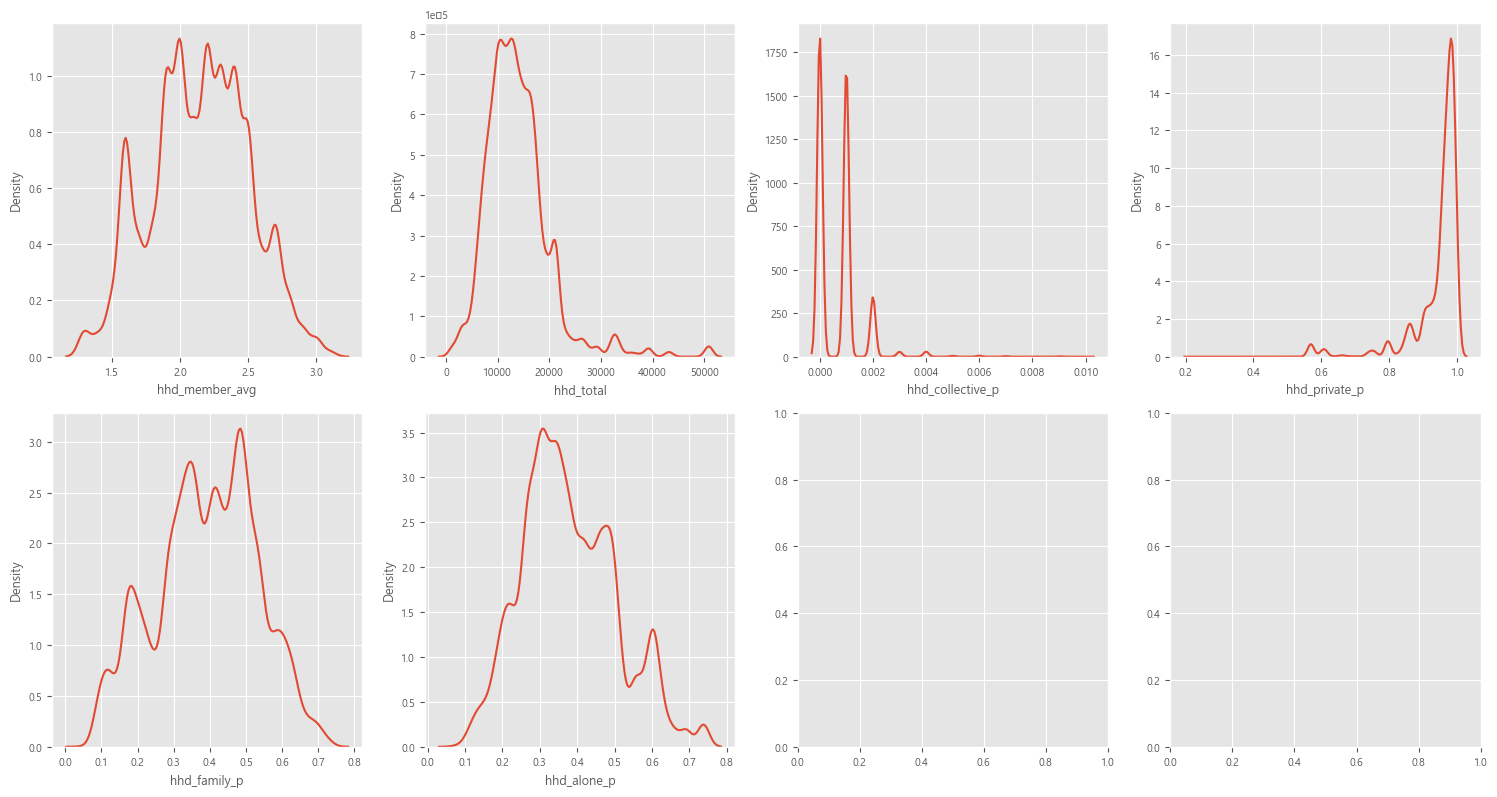

In [8]:
# 지역의 가구 관련 변수 (평균 가구원 수, 총 가구, 집합가구 비율, 일반가구 비율, 친족가구 비율, 1인가구 비율)
eda.numer_distplot(df, eda.local_hhd)

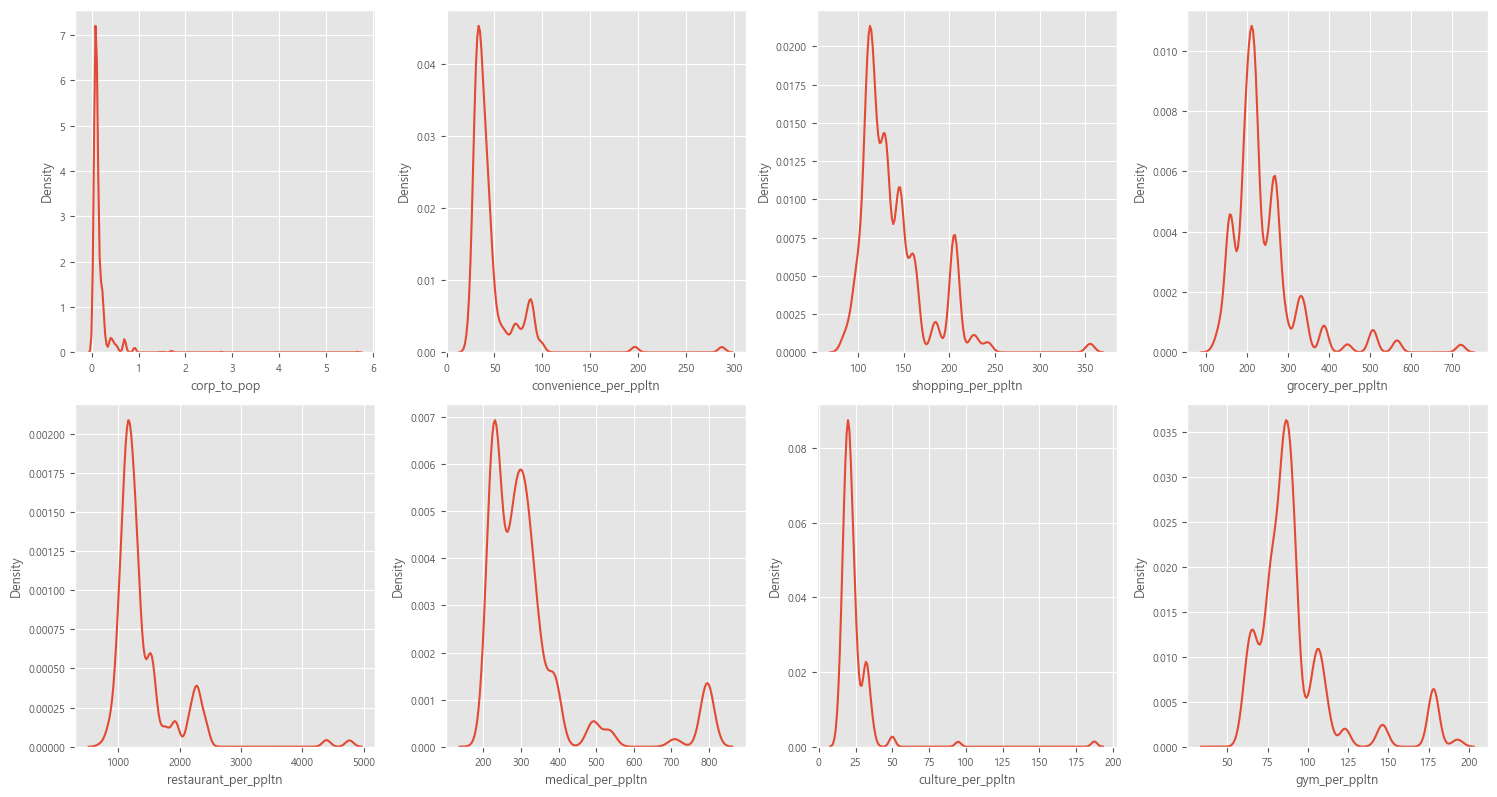

In [9]:
# 지역의 시설 관련 변수 (인구 수 대비 총 사업체 수, 인구 10만명당 편의시설 수, 쇼핑시설 수, 잡화점 수, 음식점 수, 의료시설 수, 체육시설 수)
eda.numer_distplot(df, eda.local_per_ppltn)

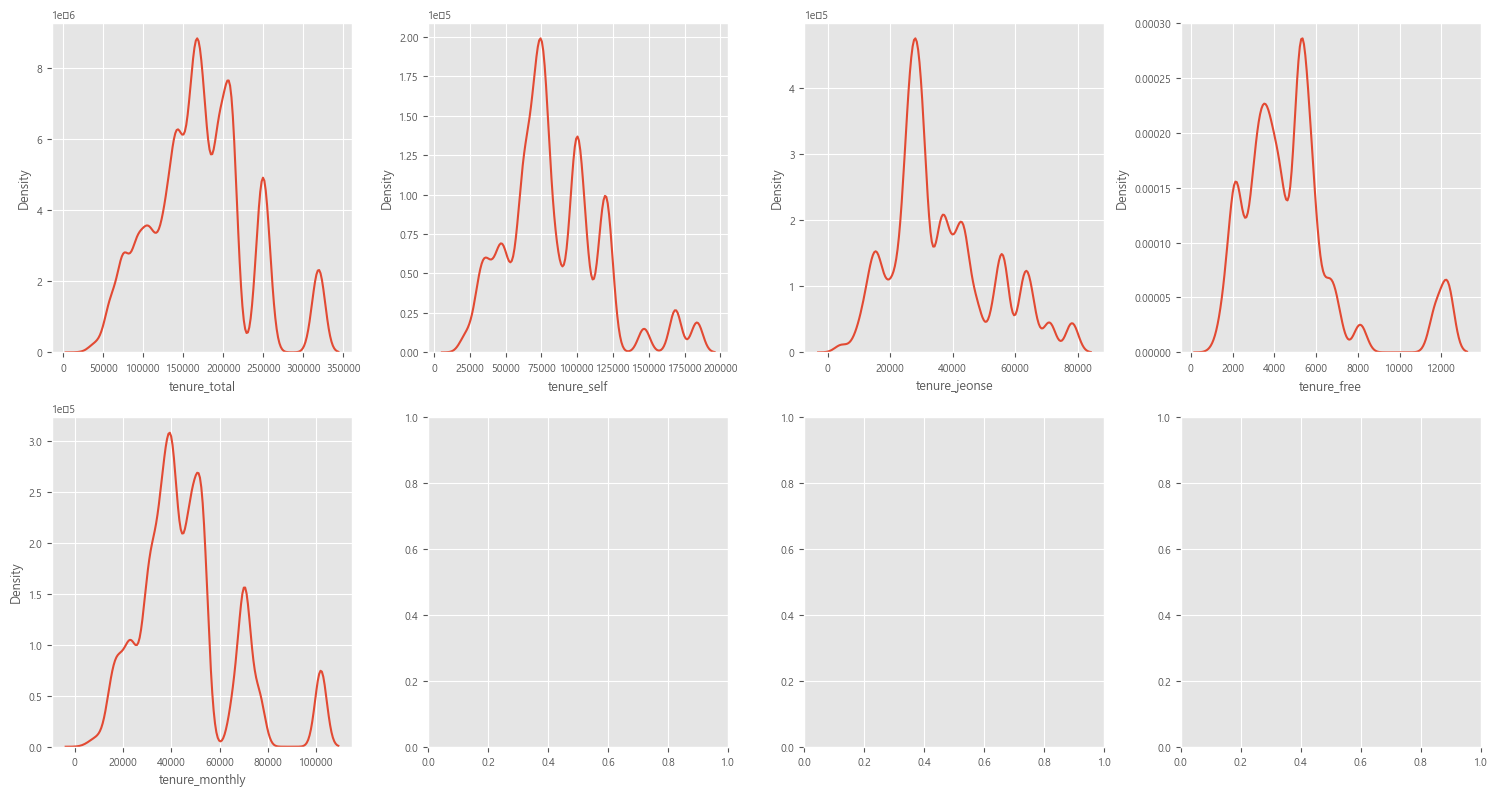

In [10]:
# 지역의 점유유형 관련 변수 (총 점유유형, 자가 비율,  전세 비율, 사택 비율, 월세 비율)
eda.numer_distplot(df, eda.local_tenure)

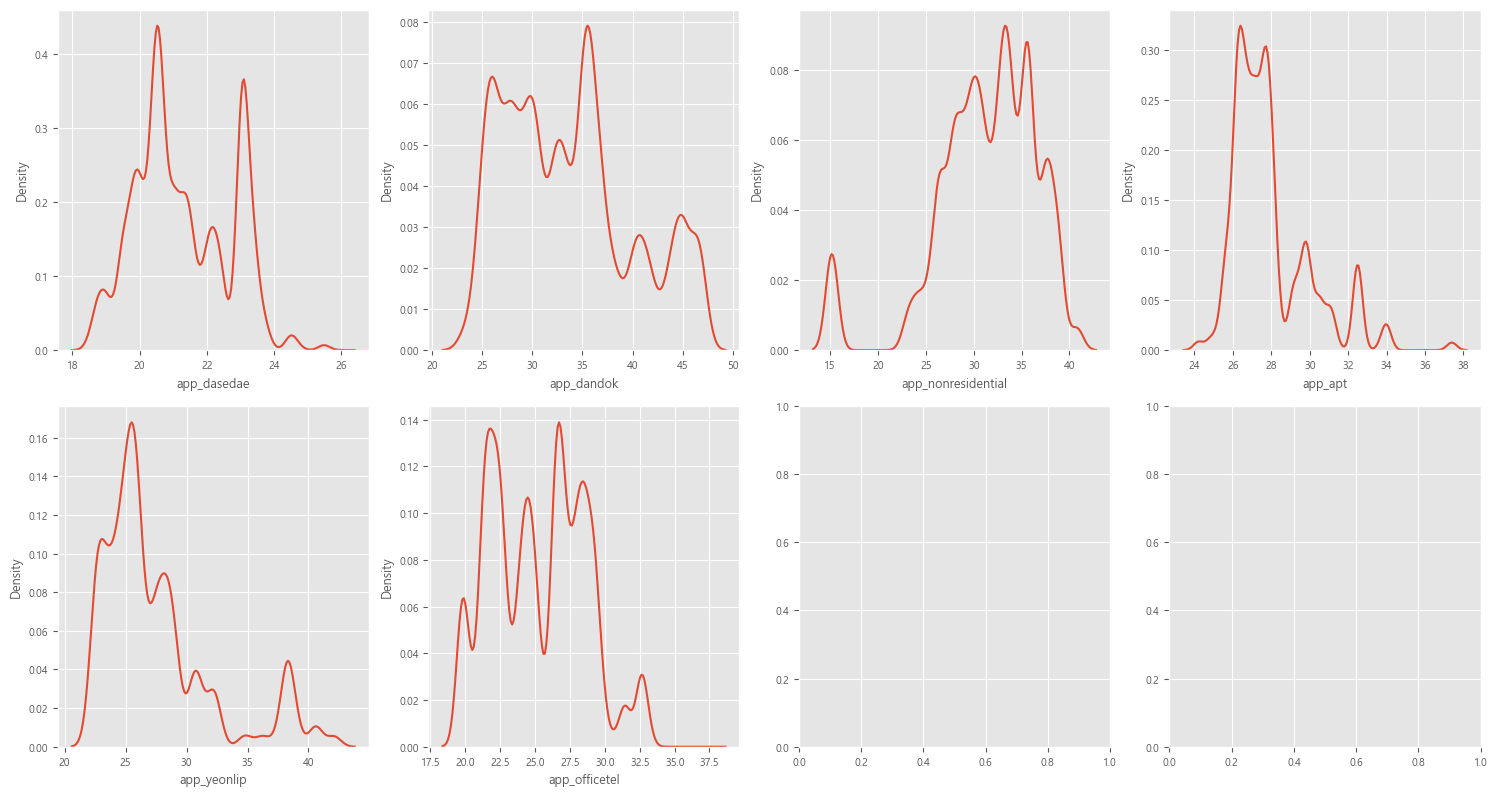

In [11]:
# 1인당 연면적 관련 변수 (다세대, 단독, 비거주건물, 아파트, 연립주택, 오피스텔 거주 1인당 연면적 평균)
eda.numer_distplot(df, eda.local_app)

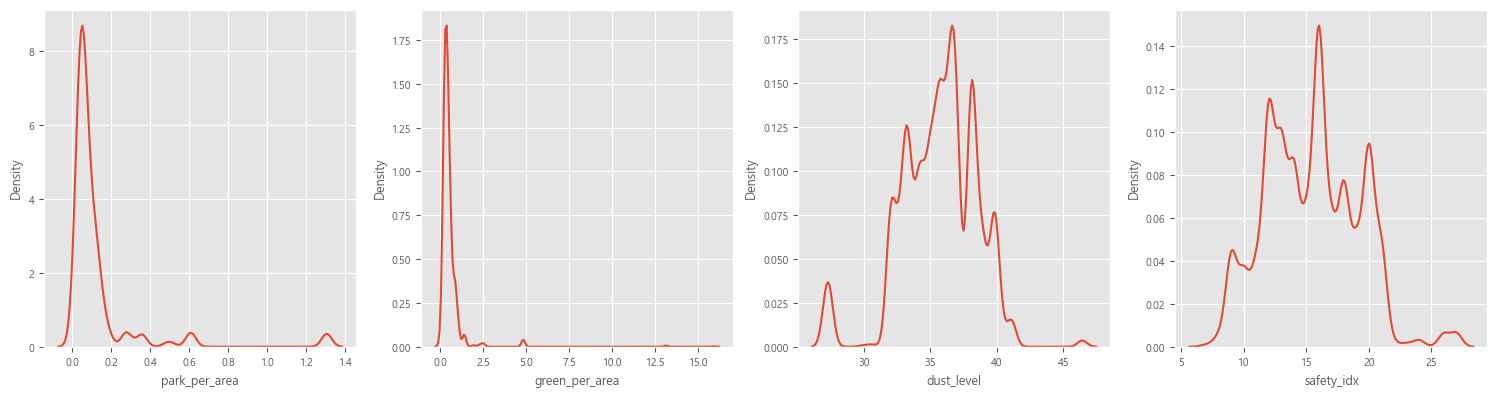

In [12]:
# 지역의 안전 및 환경 관련 변수 (지역면적 대비 공원 면적, 녹지면적, 미세먼지, 지역 안전지수)
eda.numer_distplot(df, eda.local_comf)

## 지역별 매물 특징

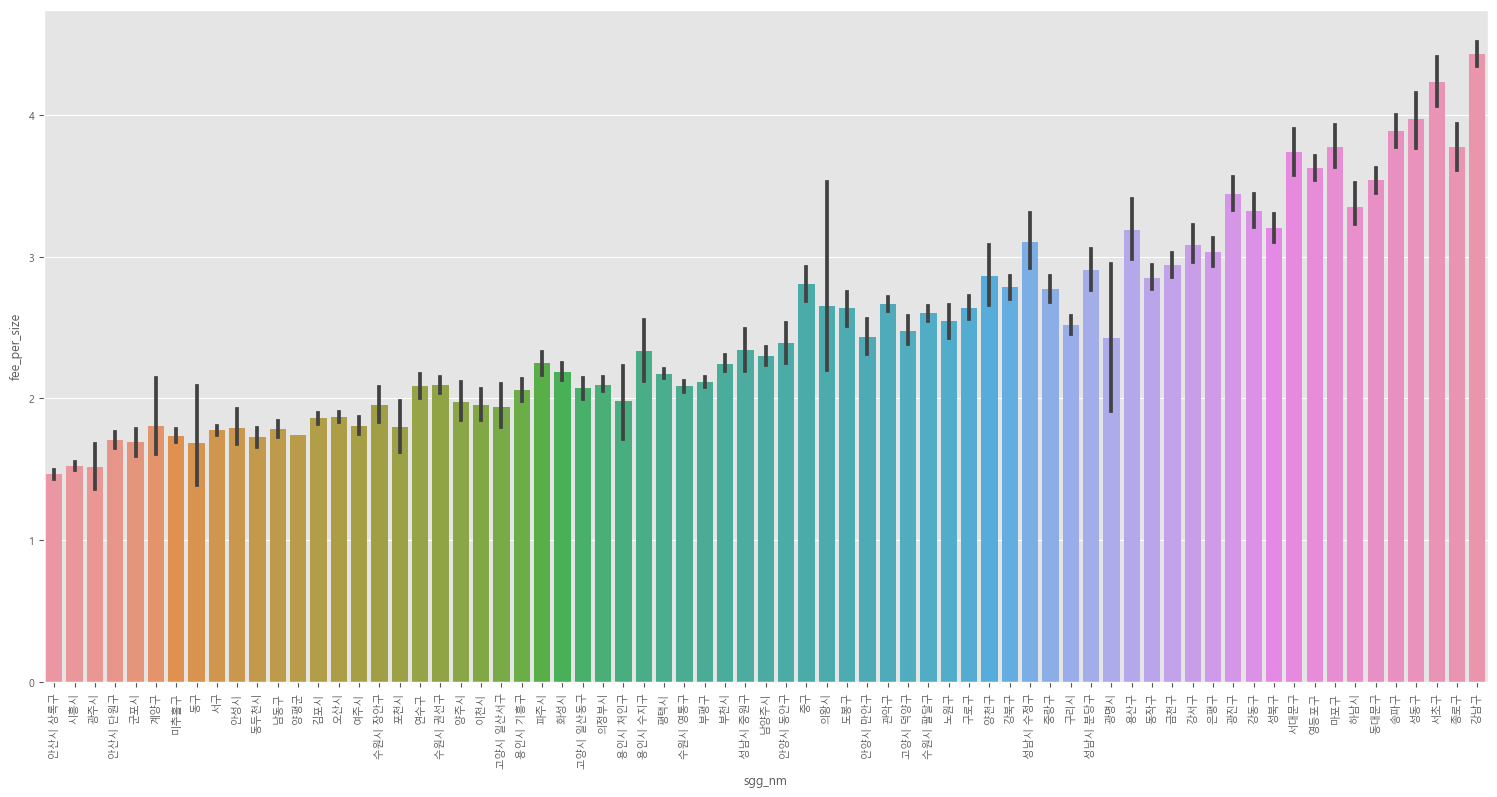

In [13]:
# 지역에 따른 평당 월 주거비
df['fee_per_size'] = df['rent_adjusted'] / df['size_m2']
eda.bar_plot(df, 'sgg_nm', 'fee_per_size')

## 전체 변수

### Boxplot
이상치 확인

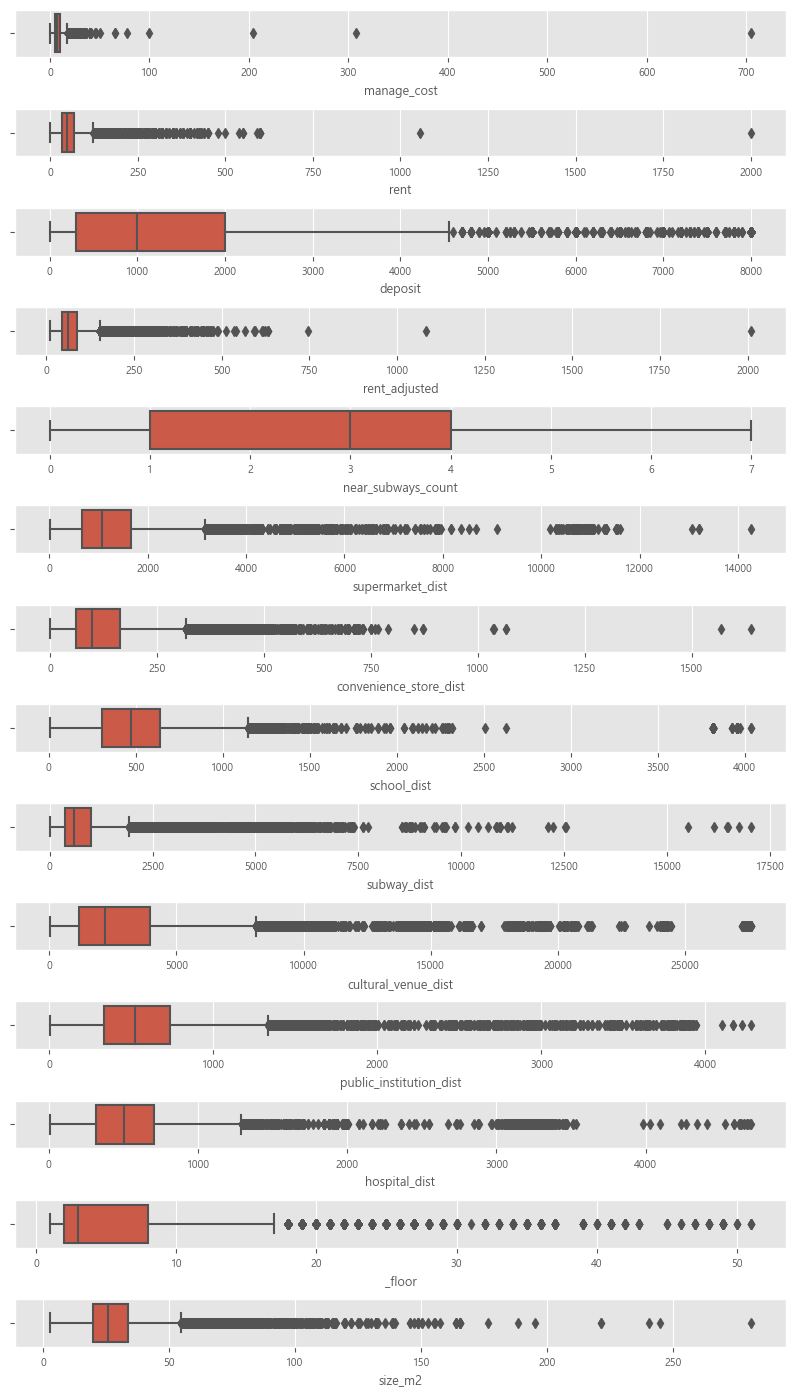

In [14]:
eda.box_plot(df[eda.room_cost+eda.room_env+['_floor', 'size_m2']])

아래와 같은 입력 오류로 판단되는 이상치 제거 후 boxplot 확인
- 관리비(manage_cost) 100만원 이상
- 월세(rent) 1000만원 이상
- 원룸이면서 평방미터(size_m2) 99㎡ 이상
- 원룸이면서 관리비(manage_cost) 50만원 이상

In [4]:
# 관리비(manage_cost) 100만원 이상
df[df["manage_cost"] > 100]

,id,service_type,address1,address2,_floor,size_m2,sales_type,rent,deposit,manage_cost,...,convenience_per_ppltn,shopping_per_ppltn,grocery_per_ppltn,restaurant_per_ppltn,medical_per_ppltn,culture_per_ppltn,gym_per_ppltn,ppltn_net_migration_rate,safety_idx,rent_adjusted
6824,36598408,오피스텔,인천시 계양구 계산동,1062,15,30.48,월세,40,500,705.0,...,31.010,115.231,224.471,1105.442,292.482,16.562,84.573,-1.303,15.0,747.083
15881,36551565,원룸,경기도 의왕시 내손동,827-4,1,25.88,월세,55,1000,308.0,...,41.328,104.274,169.127,893.958,225.079,23.525,78.205,1.514,7.0,367.167
17716,36250177,원룸,경기도 이천시 갈산동,468-11,2,26.45,월세,55,500,204.0,...,67.588,231.270,251.500,1550.380,267.133,23.909,88.278,1.143,19.0,261.083


In [5]:
# 월세(rent) 1000만원 이상
df[df["rent"] > 1000]

,id,service_type,address1,address2,_floor,size_m2,sales_type,rent,deposit,manage_cost,...,convenience_per_ppltn,shopping_per_ppltn,grocery_per_ppltn,restaurant_per_ppltn,medical_per_ppltn,culture_per_ppltn,gym_per_ppltn,ppltn_net_migration_rate,safety_idx,rent_adjusted
5629,36383385,빌라,서울시 강서구 화곡동,900-47,7,48.66,월세,2000,10,10.0,...,33.793,115.625,213.167,1141.640,313.083,21.554,90.418,-2.137,15.0,2010.042
5869,36485147,오피스텔,인천시 미추홀구 용현동,451-63,32,84.17,월세,1056,2000,20.0,...,43.485,133.490,293.779,1315.434,274.565,15.928,74.583,-0.780,21.0,1084.333


In [7]:
# 원룸이면서 평방미터(size_m2) 99㎡ 이상
df[((df["service_type"] == "원룸") & (df["size_m2"] > 99))]

,id,service_type,address1,address2,_floor,size_m2,sales_type,rent,deposit,manage_cost,...,convenience_per_ppltn,shopping_per_ppltn,grocery_per_ppltn,restaurant_per_ppltn,medical_per_ppltn,culture_per_ppltn,gym_per_ppltn,ppltn_net_migration_rate,safety_idx,rent_adjusted
1880,36595497,원룸,인천시 남동구 간석동,245-11,3,102.02,월세,40,50,10.0,...,40.742,124.224,340.118,1274.593,317.350,16.776,93.467,-2.044,18.0,50.208
12509,36517921,원룸,경기도 용인시 기흥구 상갈동,488-2,3,148.76,전세,0,8000,5.0,...,26.329,109.078,141.049,845.826,219.332,24.213,80.163,2.911,10.0,38.333
13160,36504233,원룸,경기도 파주시 탄현면 법흥리,1595-8,1,221.49,월세,27,300,3.0,...,39.694,149.125,209.653,1307.479,234.434,35.746,78.510,2.476,13.0,31.250
14878,36487876,원룸,인천시 미추홀구 용현동,221-5,2,110.61,전세,0,7000,1.0,...,43.485,133.490,293.779,1315.434,274.565,15.928,74.583,-0.780,21.0,30.167
17704,36372901,원룸,경기도 이천시 관고동,02-Aug,4,99.17,월세,33,300,6.0,...,67.588,231.270,251.500,1550.380,267.133,23.909,88.278,1.143,19.0,40.250
21009,36299563,원룸,경기도 수원시 권선구 곡반정동,539-4,6,122.31,월세,100,5000,10.0,...,29.907,120.481,188.839,1046.731,223.587,18.798,84.878,-3.076,12.0,130.833
22027,36210332,원룸,경기도 화성시 봉담읍 수기리,1-182,4,99.17,월세,80,2000,12.0,...,35.277,156.799,202.812,1223.479,210.245,21.355,87.897,4.346,14.0,100.333
22126,36511159,원룸,경기도 오산시 수청동,563-4,4,114.71,월세,62,1000,8.0,...,30.278,142.930,214.618,1182.626,227.531,22.263,90.834,1.123,16.0,74.167
26786,36545762,원룸,서울시 강남구 역삼동,633-27,2,109.42,월세,150,1000,10.0,...,88.843,203.829,155.833,2285.826,794.280,32.882,178.095,-1.180,16.0,164.167
28956,36583237,원룸,서울시 강남구 역삼동,728-36,2,105.79,월세,100,100,12.0,...,88.843,203.829,155.833,2285.826,794.280,32.882,178.095,-1.180,16.0,112.417


In [8]:
# 원룸이면서 관리비(manage_cost) 50만원 이상
df[((df["service_type"] == "원룸") & (df["manage_cost"] > 50))]

,id,service_type,address1,address2,_floor,size_m2,sales_type,rent,deposit,manage_cost,...,convenience_per_ppltn,shopping_per_ppltn,grocery_per_ppltn,restaurant_per_ppltn,medical_per_ppltn,culture_per_ppltn,gym_per_ppltn,ppltn_net_migration_rate,safety_idx,rent_adjusted
3424,36301885,원룸,인천시 서구 당하동,1107-9,4,29.75,월세,30,100,100.0,...,30.553,128.057,214.811,1143.082,224.807,16.785,84.868,-1.332,18.0,130.417
9836,36528050,원룸,경기도 시흥시 정왕동,Mar-19,3,33.06,월세,37,300,78.0,...,34.859,146.692,244.822,1336.549,228.501,19.747,92.085,5.245,14.0,116.250
15881,36551565,원룸,경기도 의왕시 내손동,827-4,1,25.88,월세,55,1000,308.0,...,41.328,104.274,169.127,893.958,225.079,23.525,78.205,1.514,7.0,367.167
17716,36250177,원룸,경기도 이천시 갈산동,468-11,2,26.45,월세,55,500,204.0,...,67.588,231.270,251.500,1550.380,267.133,23.909,88.278,1.143,19.0,261.083
21395,36535759,원룸,경기도 오산시 궐동,620-9,2,33.06,월세,50,100,65.0,...,30.278,142.930,214.618,1182.626,227.531,22.263,90.834,1.123,16.0,115.417


In [9]:
mod_df = df.copy()
mod_df = mod_df[mod_df["manage_cost"] <= 100]
mod_df = mod_df[mod_df["rent"] <= 1000]
mod_df = mod_df[mod_df["size_m2"] <= 150]
mod_df = mod_df[~((mod_df["service_type"] == "원룸") & (mod_df["size_m2"] > 99))]
mod_df = mod_df[~((mod_df["service_type"] == "원룸") & (mod_df["manage_cost"] > 50))]

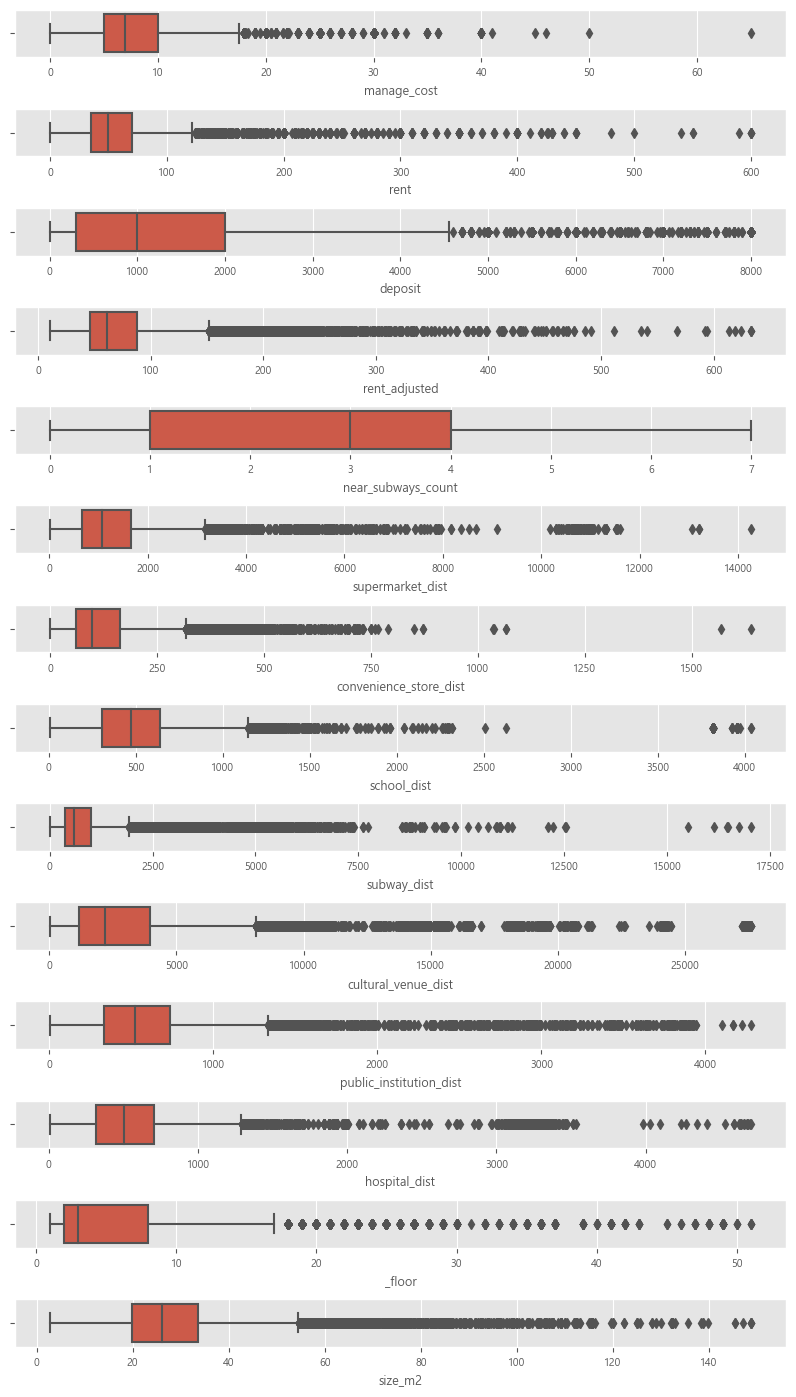

In [10]:
eda.box_plot(mod_df[eda.room_cost+eda.room_env+['_floor', 'size_m2']])

### Correlation heatmap
상관관계에 따른 변수 선택 고려: ex. 전세비율과 자가비율 상관관계가 높음 (Trade-off)

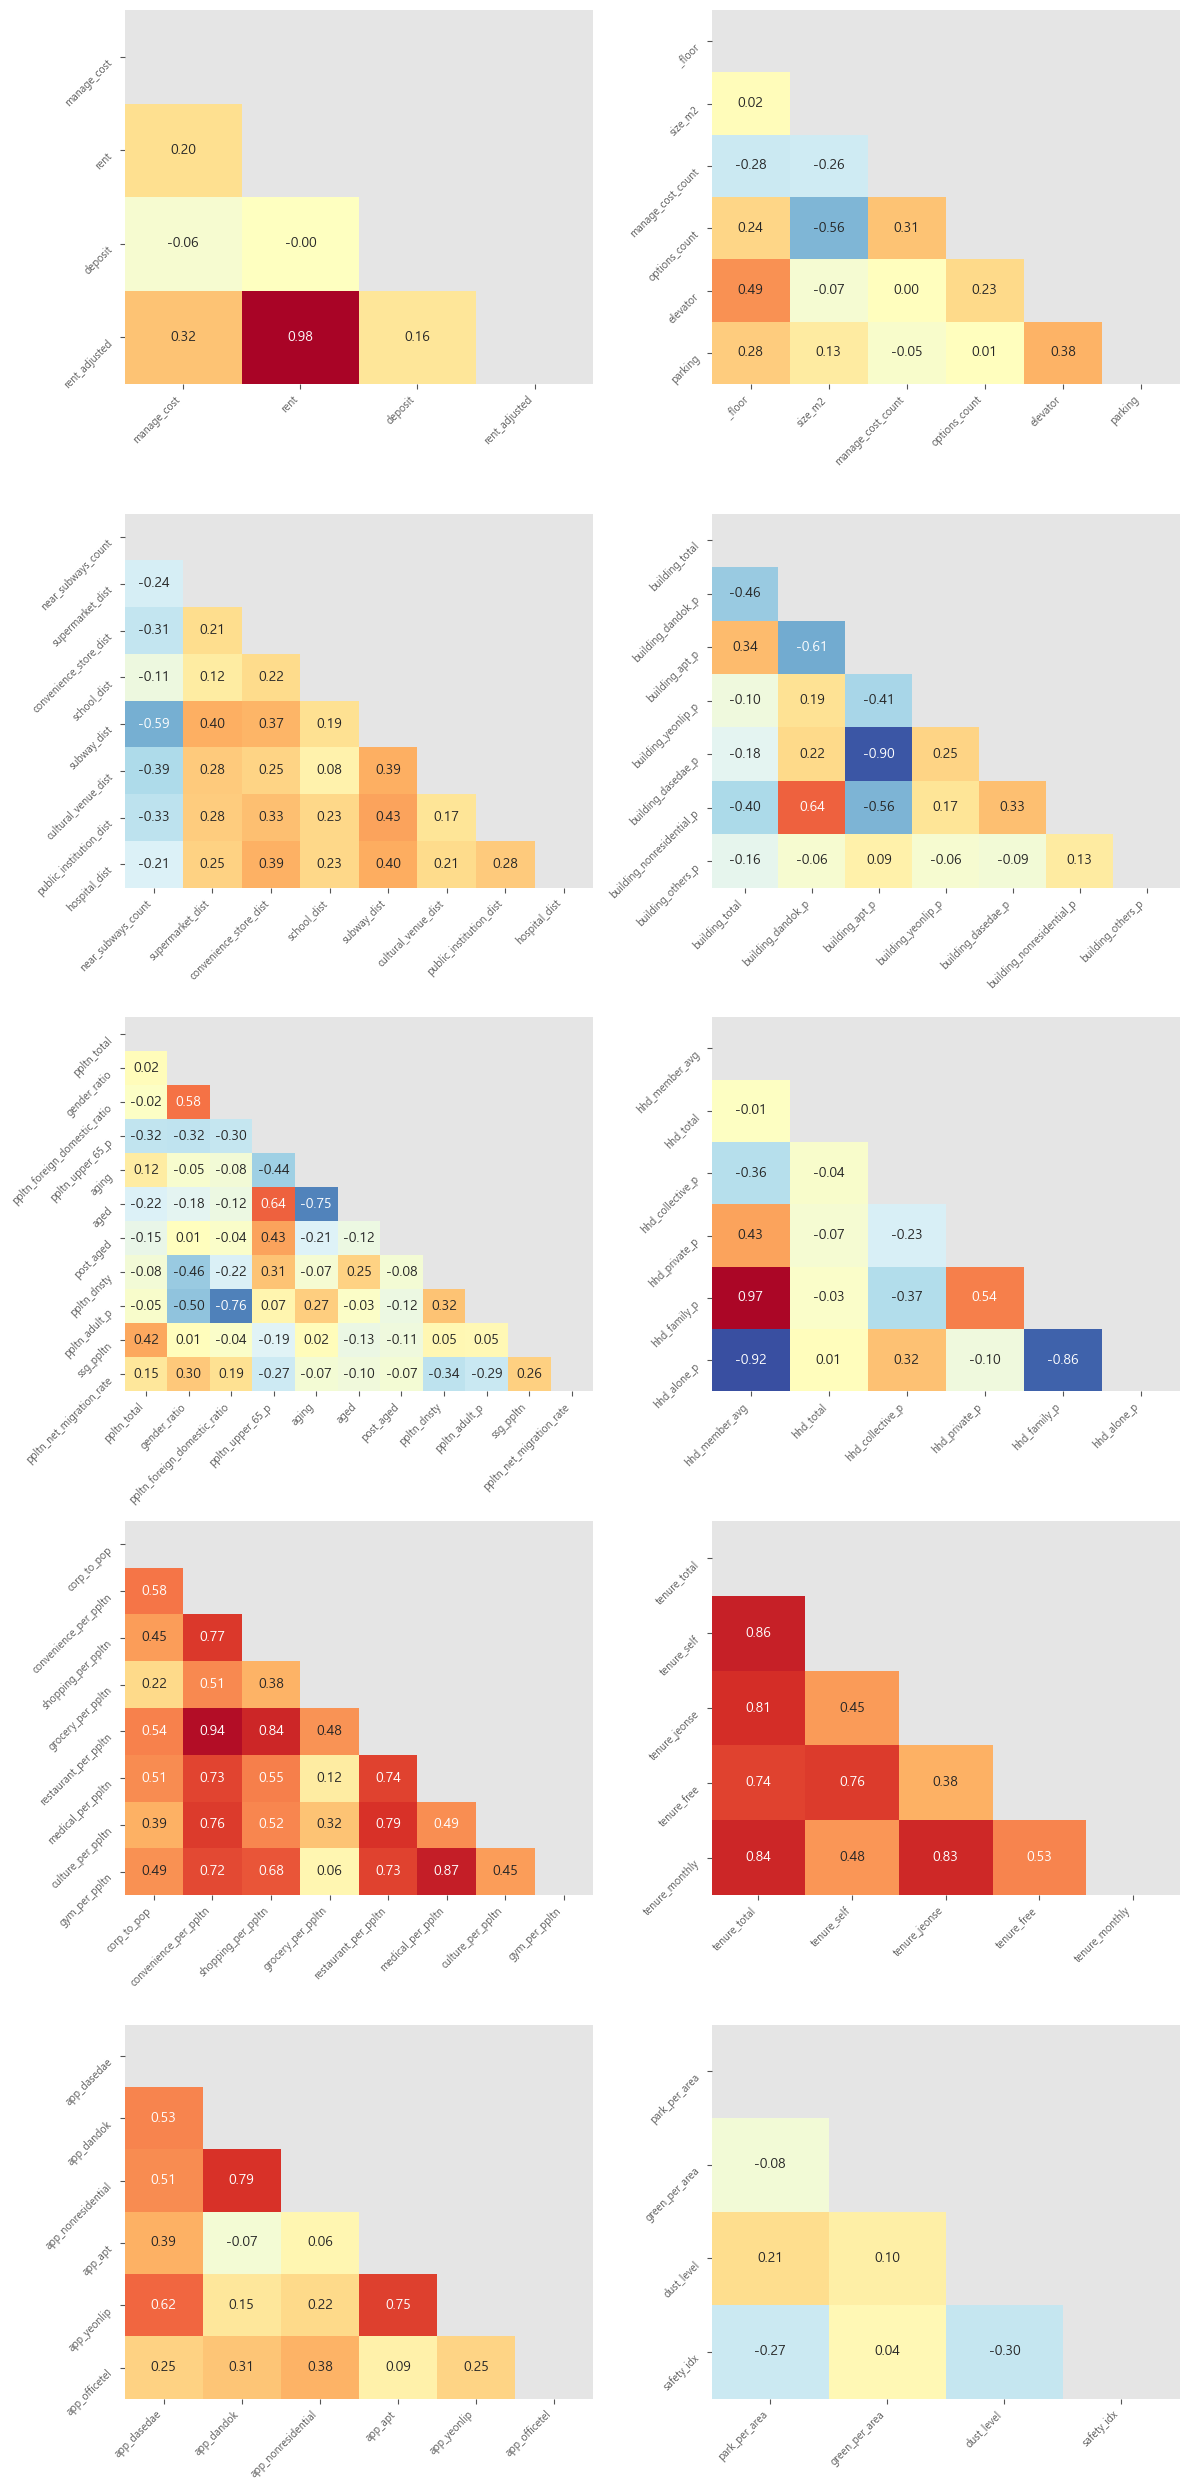

In [15]:
eda.correlation_by_group(df)